In [1]:
import os
import pandas as pd
import numpy as np
import operator
import matplotlib.pyplot as plot

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import auc, classification_report, confusion_matrix, mean_squared_error, accuracy_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split as tts, cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import VotingClassifier, RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, tree, DecisionTreeClassifier 

In [8]:
os.chdir("D:/GreyAtom/Datasets")
df = pd.read_csv("indian_liver_patient_preprocessed.csv")
#traindf = pd.get_dummies(traindf)
df.head()

,Unnamed: 0,Age_std,Total_Bilirubin_std,Direct_Bilirubin_std,Alkaline_Phosphotase_std,Alamine_Aminotransferase_std,Aspartate_Aminotransferase_std,Total_Protiens_std,Albumin_std,Albumin_and_Globulin_Ratio_std,Is_male_std,Liver_disease
0,0,1.247403,-0.420320,-0.495414,-0.428870,-0.355832,-0.319111,0.293722,0.203446,-0.147390,0,1
1,1,1.062306,1.218936,1.423518,1.675083,-0.093573,-0.035962,0.939655,0.077462,-0.648461,1,1
2,2,1.062306,0.640375,0.926017,0.816243,-0.115428,-0.146459,0.478274,0.203446,-0.178707,1,1
3,3,0.815511,-0.372106,-0.388807,-0.449416,-0.366760,-0.312205,0.293722,0.329431,0.165780,1,1
4,4,1.679294,0.093956,0.179766,-0.395996,-0.295731,-0.177537,0.755102,-0.930414,-1.713237,1,1


In [9]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [11]:
X = df.drop("Liver_disease", axis=1)
y = df["Liver_disease"]

In [31]:
dtc = DecisionTreeClassifier(random_state=42)
print(dtc.get_params())

{'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': 42, 'splitter': 'best'}


In [32]:
dt = DecisionTreeClassifier(max_depth=9, criterion='gini', max_features=0.6, min_samples_leaf=0.16)
X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.3, random_state = 42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

score = dt.score(X_test, y_test)
acc = accuracy_score(y_test, y_pred)
print(score, acc)

0.6896551724137931 0.6896551724137931


In [20]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.60      0.34      0.44        61
          1       0.71      0.88      0.79       113

avg / total       0.67      0.69      0.66       174



In [28]:
#Create a dictionary of possible parameters
params = {'max_depth':np.arange(1, 10), 
                'max_features':np.arange(0.2, 0.8, 0.1), 
                'min_samples_leaf':np.arange(0.05, 0.2, 0.01)}

#Create the GridSearchCV object
grid_clf = GridSearchCV(estimator=dtc, param_grid=params, cv=10,n_jobs=-1,scoring="accuracy")

#Fit the data with the best possible parameters
grid_clf = grid_clf.fit(X, y)

#Print the best estimator with it's parameters
print (grid_clf.best_estimator_)
print(grid_clf.best_score_)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=0.4000000000000001, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=0.060000000000000005, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')
0.7184801381692574


In [29]:
grid_clf.best_params_

{'max_depth': 3,
 'max_features': 0.4000000000000001,
 'min_samples_leaf': 0.060000000000000005}

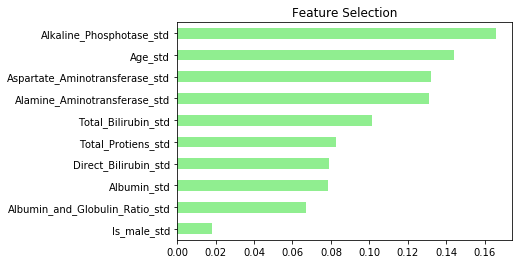

In [30]:
rf = RandomForestRegressor(n_estimators=2500, random_state=2)
rf.fit(X, y)

importances = pd.Series(data=rf.feature_importances_, index = X.columns)
importances_sorted = importances.sort_values()

importances_sorted.plot(kind='barh', color="lightgreen")
plt.title('Feature Selection')
plt.show()